In [7]:
%matplotlib inline
import h5py
import numpy as np
import os
from UG2.UG2.src.srnet import SRNet
from UG2.UG2.src import image_utils
from UG2.UG2.config import Config
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import scipy.ndimage as im

In [2]:
repo_path = "/home/susho/git/UG2/"
dataset_path = "/data/UG2_data/datasets/BSD100_SR"
data_path = "/data/UG2_data/"
results_path = repo_path + "results"

In [3]:
## create dataset
factor = 2
num_images = 100
patch_size = np.array([64, 64])
dataset_name = "BSD.h5"

# image_utils.create_dataset(factor, num_images, patch_size, dataset_path, data_path, dataset_name)




In [4]:
config = Config()
config.epochs = 100
config.cuda = True
config.lr = 0.001
config.train_files = [os.path.join(data_path, dataset_name)]
config.batch_size = 100
config.print_step = 5
config.checkpoint = 20
config.model_save_path = data_path


In [5]:
srnet = SRNet().cuda()

In [6]:
srnet.train(config)

time:  2.9726150035858154  Error:  1.87345631917
saving checkpoint at epoch:  0
time:  2.767723321914673  Error:  1.03118090828
time:  2.7832729816436768  Error:  0.920254170895
saving checkpoint at epoch:  10
time:  2.804835319519043  Error:  0.799955040216
time:  2.8248279094696045  Error:  0.655439366897
saving checkpoint at epoch:  20
time:  2.9059994220733643  Error:  0.532939051588
time:  2.857445240020752  Error:  0.463999330997
saving checkpoint at epoch:  30
time:  2.8689467906951904  Error:  0.426516160369
time:  2.8670005798339844  Error:  0.401575535536
saving checkpoint at epoch:  40
time:  2.901949167251587  Error:  0.384397163987
time:  2.964202642440796  Error:  0.3760005186
saving checkpoint at epoch:  50
time:  2.8560853004455566  Error:  0.37009442846
time:  2.860741376876831  Error:  0.343516051769
saving checkpoint at epoch:  60
time:  2.908970355987549  Error:  0.33374616007
time:  2.8758411407470703  Error:  0.317080443104
saving checkpoint at epoch:  70
time:  2

In [8]:
print(config.train_files)

['/data/UG2_data/datasets/BSD100_SR/BSD.h5']


In [35]:
img_path = os.path.join(dataset_path,"image_SRF_2" , "img_098_SRF_2_LR.png")

img = im.imread(img_path).astype(np.float32)/255.0

img = np.transpose(img, (2, 0, 1))
img = img[np.newaxis, :, :, :]

out = srnet.test(img)
out = out.data.cpu().numpy()

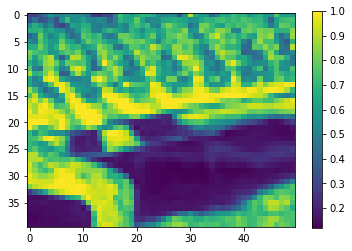

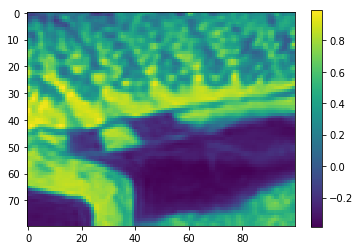

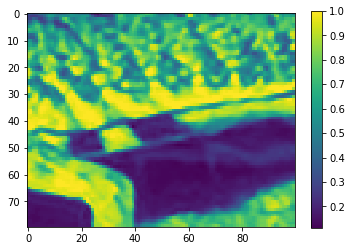

In [54]:
# plt.figure()
# plt.imshow(np.transpose((img[0]*255.0).astype(np.uint8), (1, 2, 0))[:, :, 2])
# plt.colorbar()

# plt.figure()
# plt.imshow(np.transpose((out[0]*255.0).astype(np.uint8), (1, 2, 0))[:, :, 2])
# plt.colorbar()

lr_beg = np.array([60, 100])
lr_end = np.array([100, 150])

hr_beg = lr_beg*factor
hr_end = lr_end*factor

plt.figure()
plt.imshow(img[0, 0, lr_beg[0]: lr_end[0], lr_beg[1]: lr_end[1]])
plt.colorbar()

plt.figure()
plt.imshow(out[0, 0, hr_beg[0]: hr_end[0], hr_beg[1]: hr_end[1]]*1.15)
plt.colorbar()

srcnn_path = os.path.join(dataset_path,"image_SRF_2" , "img_098_SRF_2_SRCNN.png")
srcnn_img = im.imread(srcnn_path).astype(np.float32)/255.0
srcnn_img = np.transpose(srcnn_img, (2, 0, 1))
srcnn_img = srcnn_img[np.newaxis, :, :, :]

plt.figure()
plt.imshow(srcnn_img[0, 0, hr_beg[0]: hr_end[0], hr_beg[1]: hr_end[1]])
plt.colorbar()